In [ ]:
import pandas as pd
import numpy as np
import nltk 
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Load the data csv from google drive
house_data = pd.read_csv('/content/drive/My Drive/databackup.csv')
house_data.head()

,Suburb,Address,Description,Price,Amenities,Type,Date,Insights,Schools,URL,Profile,Performance
0,0,0,0,0,0,0,0,0,0,0,0,0
1,Abbotsford-vic-3067,NaN,"Stylish living, spectacular views\nEnviable vi...","SOLD - $610,000",2\nBeds\n2\nBaths\n1\nParking,Apartment / Unit / Flat,Listing sold by advertiser 10th August 2020,"First listed on 20 July, this unit has been on...",ALL\nPRIMARY\nSECONDARY\nPRIVATE\nGOVERNMENT S...,https://www.domain.com.au/627-20-shamrock-stre...,Building & Street Profiles\nBUILDING\nSTREET\n...,Insights for 2 bedroom units in Abbotsford\nMa...
2,Abbotsford-vic-3067,NaN,A charming Victorian relishes its new role\nPe...,SOLD - Price Withheld,3\nBeds\n1\nBath\n−,House,Listing sold by advertiser 7th August 2020,"71 Yarra Street, Abbotsford VIC 3067 was last ...",ALL\nPRIMARY\nSECONDARY\nPRIVATE\nGOVERNMENT S...,https://www.domain.com.au/71-yarra-street-abbo...,School Catchment Zones for 71 Yarra Street\nAL...,Insights for 3 bedroom houses in Abbotsford\nM...
3,Abbotsford-vic-3067,71 Yarra Street Abbotsford VIC 3067,A charming Victorian relishes its new role\nPe...,SOLD - Price Withheld,3\nBeds\n1\nBath\n−,House,Listing sold by advertiser 7th August 2020,"71 Yarra Street, Abbotsford VIC 3067 was last ...",ALL\nPRIMARY\nSECONDARY\nPRIVATE\nGOVERNMENT S...,https://www.domain.com.au/71-yarra-street-abbo...,"Street Profile\nYarra St, \nAbbotsford VIC 306...",Insights for 3 bedroom houses in Abbotsford\nM...
4,Abbotsford-vic-3067,411/4 Acacia Place Abbotsford VIC 3067,BEST VALUE IN ABBOTSFORD PRICED TO SELL\nPerfe...,SOLD - Price Withheld,1\nBed\n1\nBath\n1\nParking,Apartment / Unit / Flat,Listing sold by advertiser 6th August 2020,39 other 1 bedroom unit in Abbotsford have rec...,ALL\nPRIMARY\nSECONDARY\nPRIVATE\nGOVERNMENT S...,https://www.domain.com.au/411-4-acacia-place-a...,Building & Street Profiles\nBUILDING\nSTREET\n...,Insights for 1 bedroom units in Abbotsford\nMa...


In [ ]:
#Print the datatypes 
house_data.info()

#All variables are string and there are 11 variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101 entries, 0 to 2100
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Suburb       2101 non-null   object
 1   Address      1406 non-null   object
 2   Description  2101 non-null   object
 3   Price        2101 non-null   object
 4   Amenities    2099 non-null   object
 5   Type         2101 non-null   object
 6   Date         2101 non-null   object
 7   Insights     2101 non-null   object
 8   Schools      2101 non-null   object
 9   URL          2101 non-null   object
 10  Profile      1910 non-null   object
 11  Performance  2101 non-null   object
dtypes: object(12)
memory usage: 197.1+ KB


In [ ]:
#Drop the rows with nulls
house_data = house_data.dropna() 
house_data = house_data.iloc[1:] #removing the 1st row of the dataframe as it does not have any data

Tidying up


The response variable is house price.
The predictors can be multiple, including the suburb, amenities, description, type, schools..

In [ ]:
#I select the potential independent variables as features
features_col = ['Suburb','Schools', 'Profile', 'Amenities', 'Type']
house_data[features_col]

,Suburb,Schools,Profile,Amenities,Type
3,Abbotsford-vic-3067,ALL\nPRIMARY\nSECONDARY\nPRIVATE\nGOVERNMENT S...,"Street Profile\nYarra St, \nAbbotsford VIC 306...",3\nBeds\n1\nBath\n−,House
4,Abbotsford-vic-3067,ALL\nPRIMARY\nSECONDARY\nPRIVATE\nGOVERNMENT S...,Building & Street Profiles\nBUILDING\nSTREET\n...,1\nBed\n1\nBath\n1\nParking,Apartment / Unit / Flat
5,Abbotsford-vic-3067,ALL\nPRIMARY\nSECONDARY\nPRIVATE\nGOVERNMENT S...,"Street Profile\nCharles St, \nAbbotsford VIC 3...",3\nBeds\n1\nBath\n−,House
6,Abbotsford-vic-3067,ALL\nPRIMARY\nSECONDARY\nPRIVATE\nGOVERNMENT S...,Building & Street Profiles\nBUILDING\nSTREET\n...,2\nBeds\n2\nBaths\n2\nParking,Apartment / Unit / Flat
7,Abbotsford-vic-3067,ALL\nPRIMARY\nSECONDARY\nPRIVATE\nGOVERNMENT S...,"Street Profile\nMarine Pde, \nAbbotsford VIC 3...",3\nBeds\n1\nBath\n2\nParking,House
...,...,...,...,...,...
2096,Airport West-vic-3042,ALL\nPRIMARY\nSECONDARY\nPRIVATE\nGOVERNMENT S...,"Street Profile\nVictory Rd, \nAirport West VIC...",3\nBeds\n2\nBaths\n1\nParking\n419m²,House
2097,Airport West-vic-3042,ALL\nPRIMARY\nSECONDARY\nPRIVATE\nGOVERNMENT S...,"Street Profile\nMarshall Rd, \nAirport West VI...",4\nBeds\n1\nBath\n2\nParking,House
2098,Airport West-vic-3042,ALL\nPRIMARY\nSECONDARY\nPRIVATE\nGOVERNMENT S...,"Street Profile\nClydesdale Rd, \nAirport West ...",3\nBeds\n2\nBaths\n2\nParking,Townhouse
2099,Airport West-vic-3042,ALL\nPRIMARY\nSECONDARY\nPRIVATE\nGOVERNMENT S...,Building & Street Profiles\nBUILDING\nSTREET\n...,2\nBeds\n2\nBaths\n1\nParking,Apartment / Unit / Flat


In [ ]:
#Clean the features by removing the stopwords, regular expressions and replace with a space
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub(' ', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', ' ')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

#Applying the clean_text() to features
house_data['Schools'] = house_data['Schools'].apply(clean_text)
house_data['Profile'] = house_data['Profile'].apply(clean_text)
house_data['Amenities'] = house_data['Amenities'].apply(clean_text)
house_data['Type'] = house_data['Type'].apply(clean_text)
house_data['Suburb'] = house_data['Suburb'].apply(clean_text)

In [ ]:
#Further cleaning of the column 'Suburb'
#We will remove the vic - postcode and preserve only the suburb's name
def clean_sub(text):
  text = text.replace('vic','')
  return text


house_data['Suburb'] = house_data['Suburb'].apply(clean_sub)
house_data['Suburb'] = house_data['Suburb'].str.replace('\d+', '')

In [ ]:
#Cleaning the house price data and converting to a numeric column
def remove(text):
  text = text.replace('SOLD -','')
  text = text.replace('Price Withheld','0')
  text = text.replace('$','')
  text = text.replace(',','')
  return text

house_data['Price'] = house_data['Price'].apply(remove)
house_data['Price'] = pd.to_numeric(house_data['Price'])
house_data['Price']

3             0
4             0
5        966000
6             0
7       1580000
         ...   
2096     665000
2097     690000
2098     865000
2099     500000
2100     750000
Name: Price, Length: 1213, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbdc7e1feb8>]],
      dtype=object)

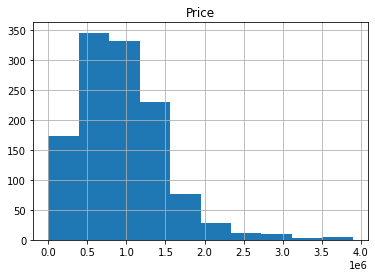

In [ ]:
#Plot of histogram for the house price is skewed
house_data.hist(column='Price')

In [ ]:
#Median price of the houses
median_price = house_data.median()
print(median_price)
#Replace the null values of house price data with the median figure
house_data=house_data.replace({'Price': {0: 775000.0}})
house_data['Price']

Price    865000.0
dtype: float64


3        775000.0
4        775000.0
5        966000.0
6        775000.0
7       1580000.0
          ...    
2096     665000.0
2097     690000.0
2098     865000.0
2099     500000.0
2100     750000.0
Name: Price, Length: 1213, dtype: float64

In [ ]:
house_data[features_col]

,Suburb,Schools,Profile,Amenities,Type
3,abbotsford,primary secondary private government school ca...,street profile yarra st abbotsford vic 3067 pr...,3 beds 1 bath,house
4,abbotsford,primary secondary private government school ca...,building street profiles building street 4 aca...,1 bed 1 bath 1 parking,apartment unit flat
5,abbotsford,primary secondary private government school ca...,street profile charles st abbotsford vic 3067 ...,3 beds 1 bath,house
6,abbotsford,primary secondary private government school ca...,building street profiles building street 20 sh...,2 beds 2 baths 2 parking,apartment unit flat
7,abbotsford,primary secondary private government school ca...,street profile marine pde abbotsford vic 3067 ...,3 beds 1 bath 2 parking,house
...,...,...,...,...,...
2096,airport west,primary secondary private government school ca...,street profile victory rd airport west vic 304...,3 beds 2 baths 1 parking 419m,house
2097,airport west,primary secondary private government school ca...,street profile marshall rd airport west vic 30...,4 beds 1 bath 2 parking,house
2098,airport west,primary secondary private government school ca...,street profile clydesdale rd airport west vic ...,3 beds 2 baths 2 parking,townhouse
2099,airport west,primary secondary private government school ca...,building street profiles building street 4 kit...,2 beds 2 baths 1 parking,apartment unit flat


Explaratory Data Analysis

['house' 'apartment unit flat' 'townhouse' 'vacant land'
 'new apartments plan' 'villa' 'terrace']


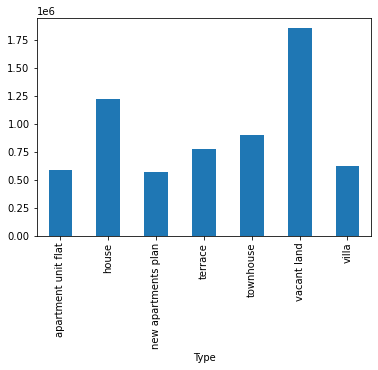

In [ ]:
#Plotting house price against the type of house
print(house_data['Type'].unique())
df = house_data.groupby('Type')['Price'].mean()
df.plot.bar()

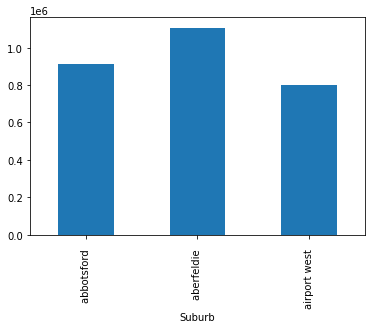

In [ ]:
#PLotting house price against the suburb name
df = house_data.groupby('Suburb')['Price'].mean()
df.plot.bar()

Feature Extracting

In [ ]:
house_data.Amenities[30] 

'3 beds 2 baths 2 parking'

In [ ]:
#extracting the number of baths/beds/parkings and storing them as seperate columns 
regex = r'(?P<beds>\d)\sbeds?\s(?P<bath>\d+)\sbaths?\s?(?P<parking>\d)?'
house_data = pd.concat([house_data, house_data['Amenities'].str.extract(regex)], axis=1)

In [ ]:
#Fill the null values in the parking column == 0
house_data['parking'] = house_data['parking'].fillna(0)

In [ ]:
features_col = ['Suburb', 'Type', 'beds', 'bath', 'parking']
house_data[features_col]

,Suburb,Type,beds,bath,parking
3,abbotsford,house,3,1,0
4,abbotsford,apartment unit flat,1,1,1
5,abbotsford,house,3,1,0
6,abbotsford,apartment unit flat,2,2,2
7,abbotsford,house,3,1,2
...,...,...,...,...,...
2096,airport west,house,3,2,1
2097,airport west,house,4,1,2
2098,airport west,townhouse,3,2,2
2099,airport west,apartment unit flat,2,2,1
